In [49]:
# Importing Python libraries

import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from tabulate import tabulate
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [50]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

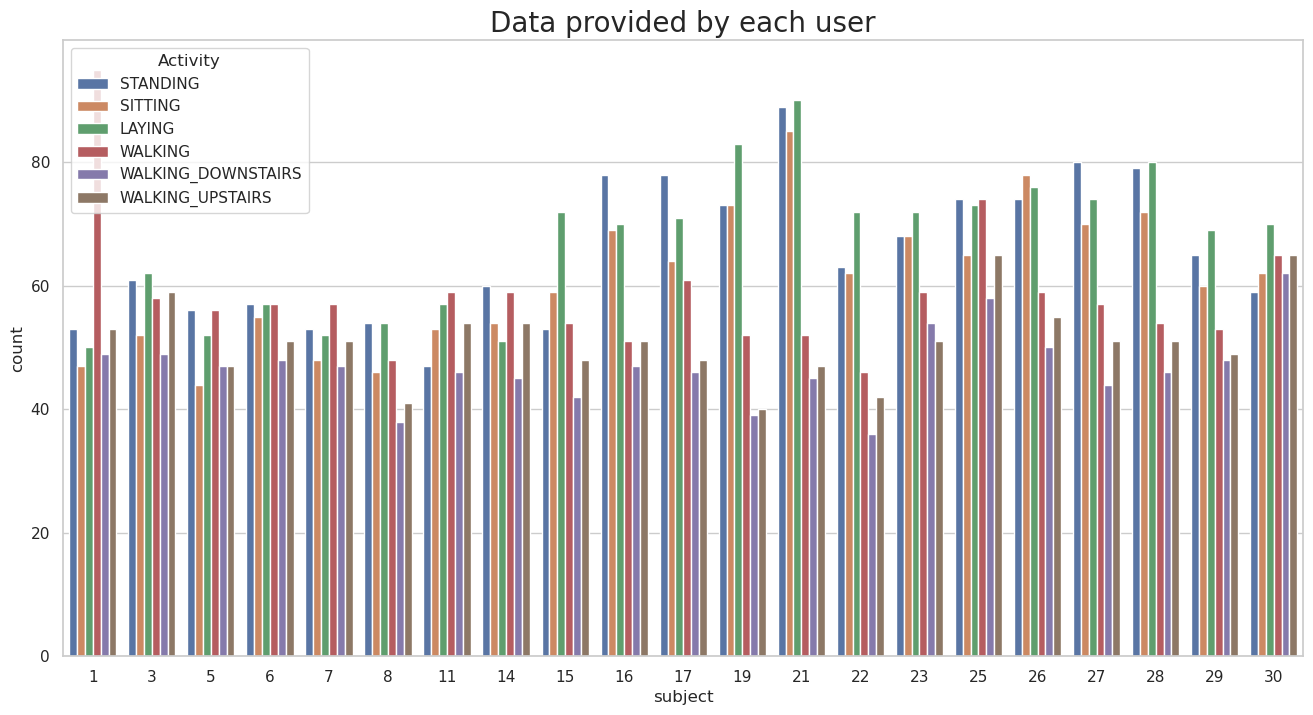

In [51]:
# Visualizing The Dataset:

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

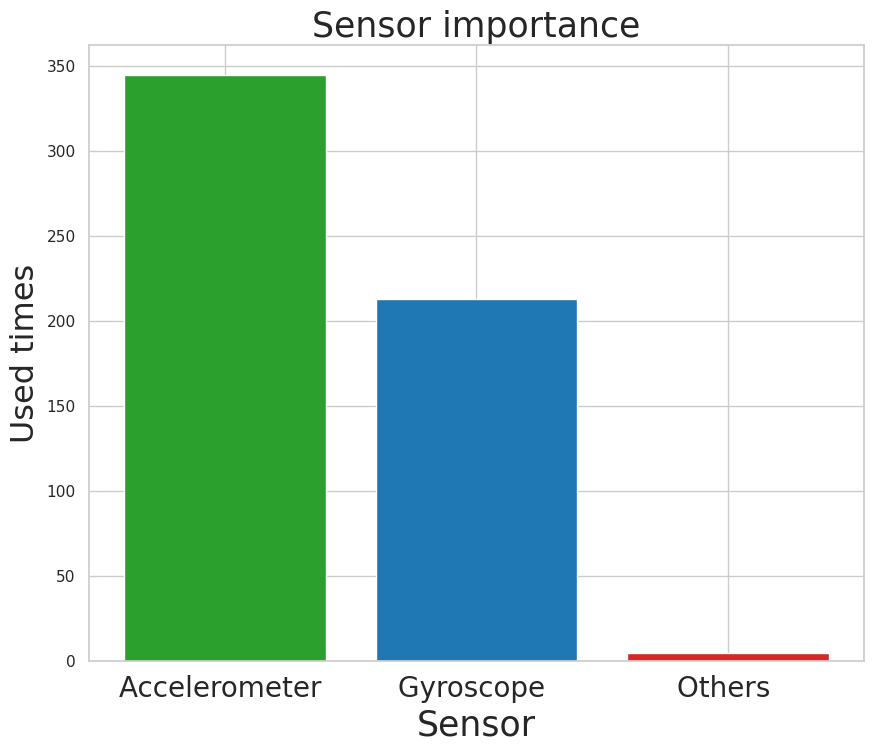

In [52]:
# Visualizing Sensor Importance:

sensor_counts = {'Accelerometer': 0, 'Gyroscope': 0, 'Others': 0}
for col in train.columns:
    if 'Acc' in col:
        sensor_counts['Accelerometer'] += 1
    elif 'Gyro' in col:
        sensor_counts['Gyroscope'] += 1
    else:
        sensor_counts['Others'] += 1

plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope ','Others '], height = [sensor_counts['Accelerometer'], sensor_counts['Gyroscope'], sensor_counts['Others']], color=['tab:green', 'tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Sensor", size=25)
plt.ylabel("Used times", size=23)
plt.xticks(fontsize=20)
plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

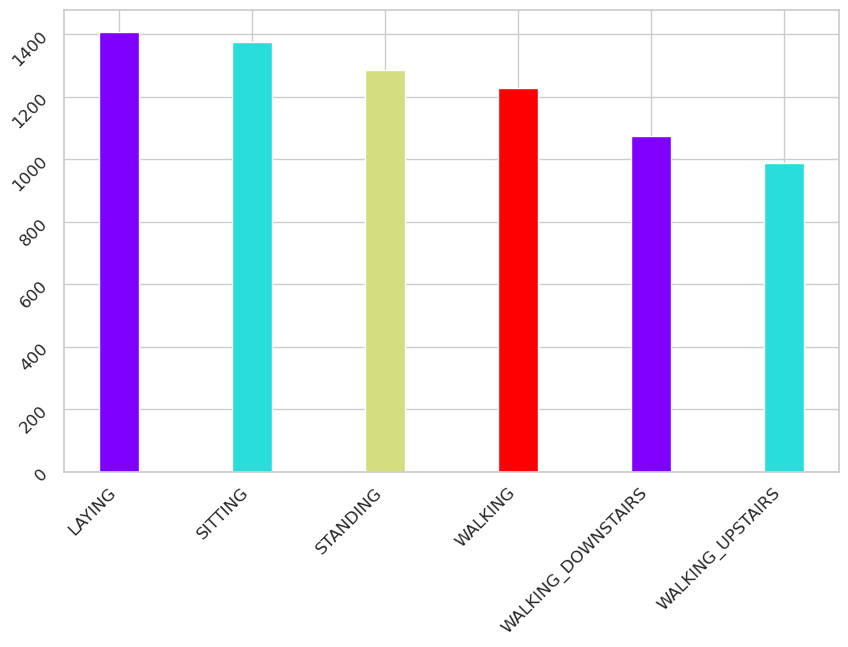

In [53]:
# Bar plot showing count of each activity in the dataset

activity = train["Activity"]
count_of_each_activity = np.array(activity.value_counts())
activities = sorted(activity.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,6))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12,ha='right')
plt.yticks(rotation=45,fontsize=12)

([<matplotlib.patches.Wedge at 0x21acb09b850>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

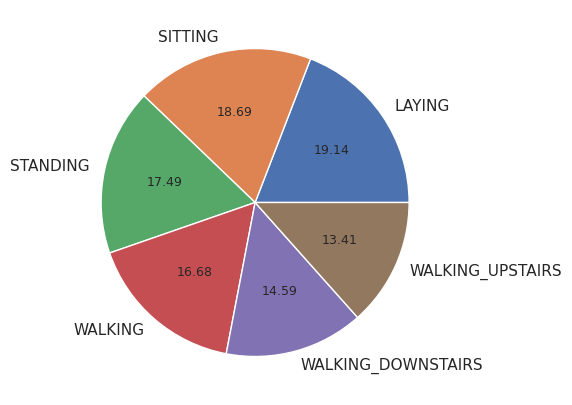

In [54]:
# Pie chart showing count of each activity in the dataset

mlt.rcParams['font.size'] = 9.0
plt.figure(figsize=(10,5))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\arpan\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

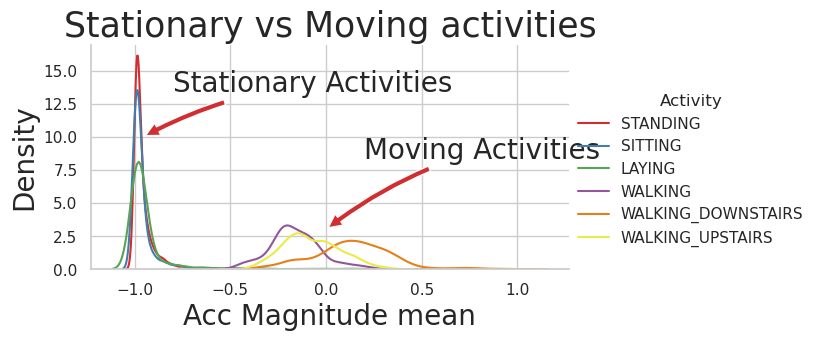

In [55]:
# The plot is divided into two parts, one for stationary activities and the other for moving activities

sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', aspect=2)
facetgrid.map(sns.kdeplot,'tBodyAccMag-mean()')\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

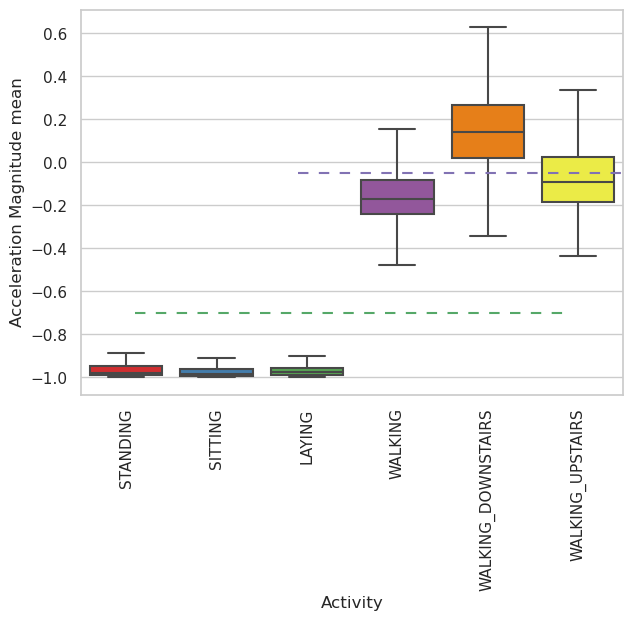

In [56]:
# Visualization of the mean acceleration magnitude for different activities in a dataset

plt.figure(figsize=(7,5))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Analysing the data

print("--------- Training Data ---------")
print(train.head())
print("--------- Test Data ---------")
print(test.head())

--------- Training Data ---------
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  t

In [58]:
# Checking for null values inside the data

# NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
# NAs[NAs.sum(axis=1) > 0]
print("Training Data:",train.isnull().values.any())

Training Data: False


In [59]:
# NAs2 = pd.concat([test.isnull().sum()], axis=1, keys=["Test"])
# NAs2[NAs2.sum(axis=1) > 0]
print("Testing Data:",test.isnull().values.any())

Testing Data: False


In [60]:
# In this case we don't need the 'subject' column

train.drop('subject', axis =1, inplace=True)
test.drop('subject', axis =1, inplace=True)

In [61]:
print("************TRAIN*************")
print(train.head())
print("*************Test*************")
print(test.head())

************TRAIN*************
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBod

In [62]:
# Showing all the columns

colm = [i for i in test]
colm

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [63]:
# It is also important to check the various data types present in our data.
# In this particular case, we can observe that we have 561 dimensions of float type data and 1 dimension of object type data.

print("*************Train*************")
print(train.dtypes.value_counts())
print("*************Test*************")
print(test.dtypes.value_counts())

*************Train*************
float64    561
object       1
dtype: int64
*************Test*************
float64    561
object       1
dtype: int64


In [64]:
# The object type data

obj_feature = (train.dtypes == object)
obj_col = train.columns[obj_feature]
obj_col

Index(['Activity'], dtype='object')

In [65]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [66]:
for x in [train, test]:
    print(x['Activity'])

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object
0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object


In [67]:
# Applying LabelEncoder function

labEncoder = LabelEncoder()
for x in [train, test]:
    x['Activity'] = labEncoder.fit_transform(x.Activity)
    
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

In [68]:
train.Activity.sample(10)

2716    2
5021    4
4275    0
3137    0
5749    0
4167    4
6448    5
4499    4
7077    3
5347    0
Name: Activity, dtype: int32

In [69]:
test.Activity.sample(10)

1549    1
1085    1
1664    5
2907    4
906     4
639     2
283     5
2560    5
1307    3
329     2
Name: Activity, dtype: int32

In [70]:
test.Activity

0       2
1       2
2       2
3       2
4       2
       ..
2942    5
2943    5
2944    5
2945    5
2946    5
Name: Activity, Length: 2947, dtype: int32

In [71]:
# Finding the Correlation/ Relationships between the features
# This dataframe can be used to analyze the relationships between different features and 
# identify any highly correlated features that may need to be removed or 
# combined in order to avoid multicollinearity in a machine learning model.

feature_columns = train.columns[: -1] 
correlated_values = train[feature_columns].corr()
correlated_values = (correlated_values.stack().to_frame().reset_index().rename(columns={'level_0': 'Features-1', 'level_1': 'Features-2', 0:'Correlation'}))
correlated_values

,Features-1,Features-2,Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903
...,...,...,...
314716,"angle(Z,gravityMean)","angle(tBodyGyroMean,gravityMean)",-0.019903
314717,"angle(Z,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",-0.005656
314718,"angle(Z,gravityMean)","angle(X,gravityMean)",-0.643655
314719,"angle(Z,gravityMean)","angle(Y,gravityMean)",0.594885


In [72]:
correlated_values['Absolute_Correlation'] = correlated_values.Correlation.abs()
correlated_values

,Features-1,Features-2,Correlation,Absolute_Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.148061,0.148061
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.256952,0.256952
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.000619,0.000619
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.021903,0.021903
...,...,...,...,...
314716,"angle(Z,gravityMean)","angle(tBodyGyroMean,gravityMean)",-0.019903,0.019903
314717,"angle(Z,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",-0.005656,0.005656
314718,"angle(Z,gravityMean)","angle(X,gravityMean)",-0.643655,0.643655
314719,"angle(Z,gravityMean)","angle(Y,gravityMean)",0.594885,0.594885


In [73]:
# Picking most correlated features
train_field = correlated_values.sort_values('Correlation', ascending = False).query('Absolute_Correlation>0.85')
train_field

,Features-1,Features-2,Correlation,Absolute_Correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
114648,tBodyAccMag-min(),tBodyAccMag-min(),1.000000,1.000000
114086,tBodyAccMag-max(),tBodyAccMag-max(),1.000000,1.000000
113537,tBodyAccMag-mad(),tGravityAccMag-mad(),1.000000,1.000000
113524,tBodyAccMag-mad(),tBodyAccMag-mad(),1.000000,1.000000
...,...,...,...,...
42149,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,2",-0.994684,0.994684
314202,"angle(Z,gravityMean)",tGravityAcc-mean()-Z,-0.995070,0.995070
24122,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.995070,0.995070
41027,"tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2",-0.995297,0.995297


In [74]:
# Use StratifiedShuffleSplit to split the data into train and validation sets
split_data = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

# Get the indices for train and validation sets
train_idx, val_idx = next(split_data.split(train[feature_columns], train.Activity))

# Split the train data into feature columns and target column
x_train = train.loc[train_idx, feature_columns]
y_train = train.loc[train_idx, 'Activity']

# Split the validation data into feature columns and target column
x_val = train.loc[val_idx, feature_columns]
y_val = train.loc[val_idx, 'Activity']

In [75]:
y_train.value_counts(normalize = True)

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64

In [76]:
y_val.value_counts(normalize = True)

0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64

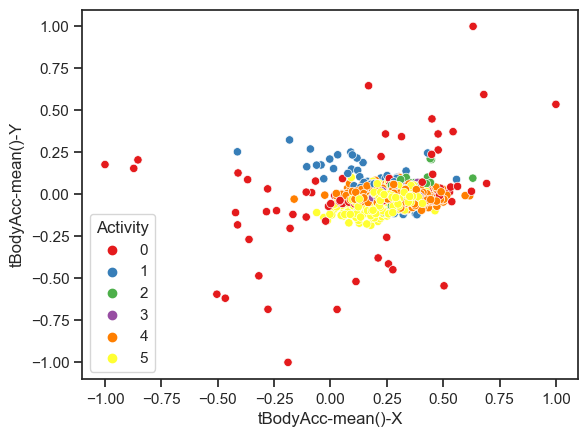

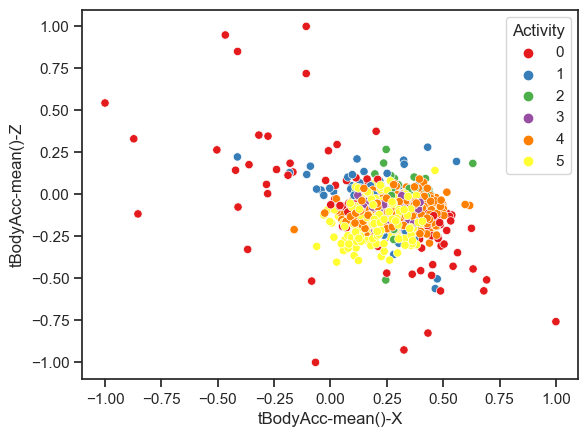

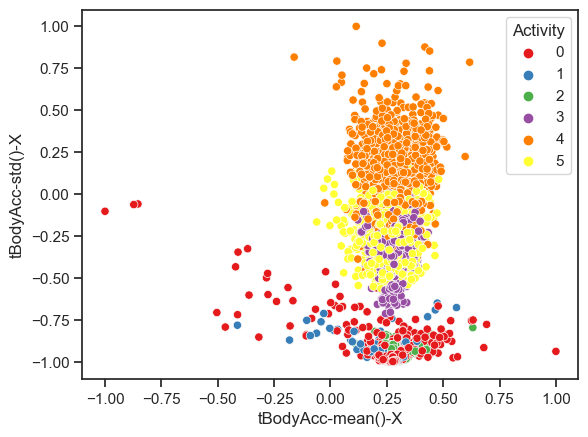

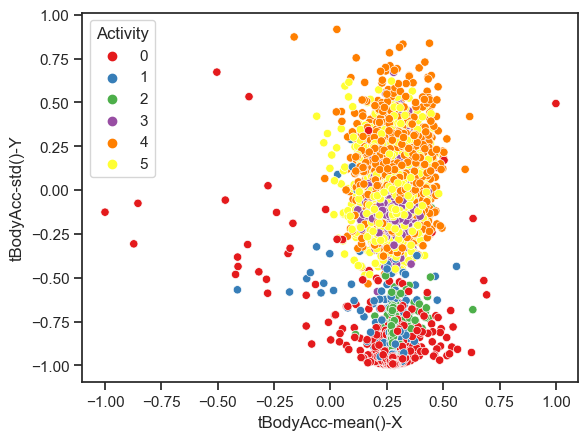

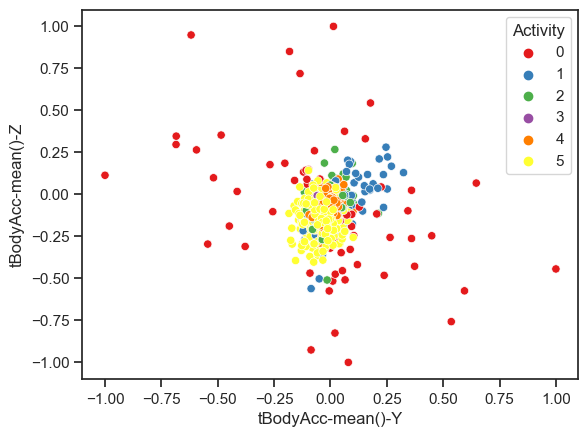

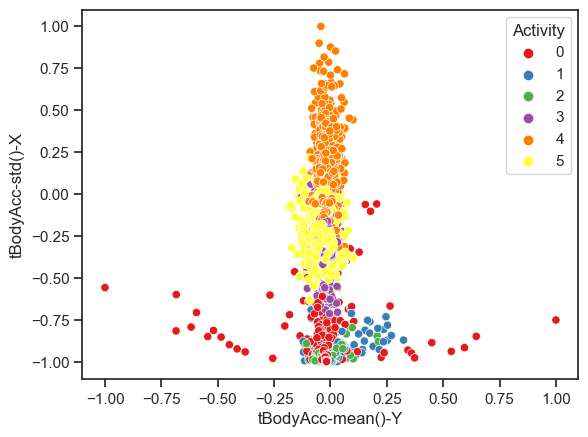

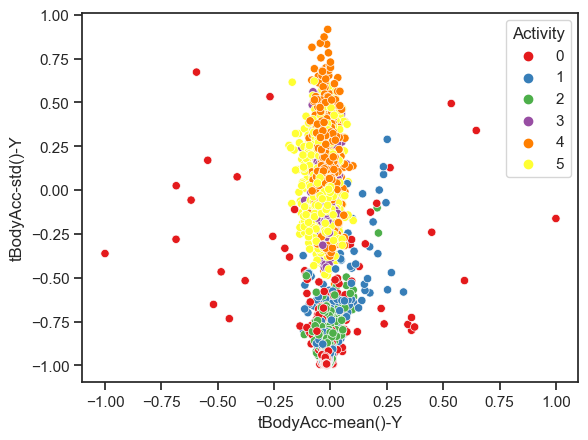

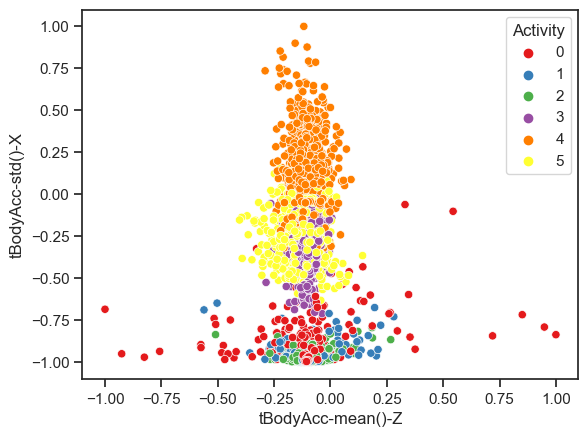

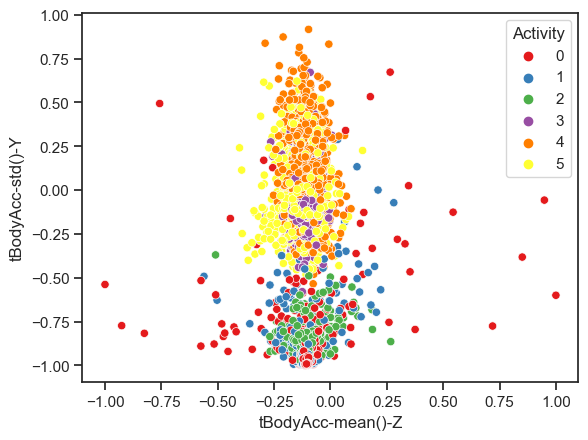

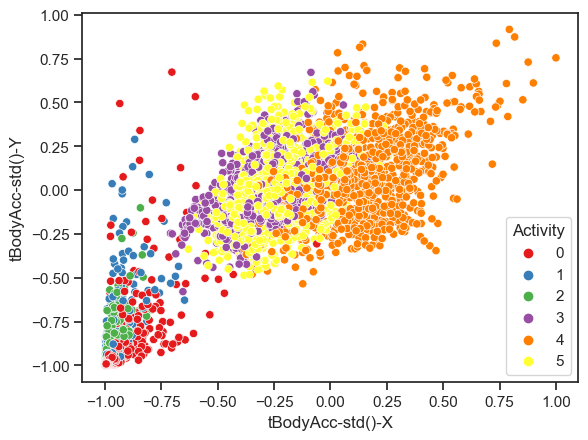

In [77]:
# Plot scatterplots for selected pairs of features
# By using 'Activity' as the hue, the scatterplots can help visualize how different activities are distributed 
# in the feature space. This can provide insights into how different activities are related to each other and 
# how they can be differentiated based on the recorded features.

sns.set(style='ticks', color_codes=True)
cols_to_plot = train.columns[:5]
for i, col_i in enumerate(cols_to_plot):
    for j, col_j in enumerate(cols_to_plot):
        if i < j:
            sns.scatterplot(x=col_i, y=col_j, hue='Activity', data=train, palette='Set1')
            plt.show()

In [78]:
# Initialize a Random Forest classifier with 100 trees and set the random state to ensure reproducibility
ran_for = RandomForestClassifier(n_estimators = 100, random_state=42)
ran_for = ran_for.fit(x_train, y_train)

# Initialize a K-Nearest Neighbors classifier with k=15 and the 'distance' weighting scheme using the Manhattan distance metric
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', metric='manhattan')
knn = knn.fit(x_train, y_train)

# Initialize a Logistic Regression classifier with default settings and set the random state to ensure reproducibility
logi_reg = LogisticRegression(random_state=42, solver='liblinear')
logi_reg = logi_reg.fit(x_train, y_train)

# Initialize a Multi-Class Support Vector Machine classifier using the One-vs-Rest strategy and the RBF kernel with default settings
svm_mc = OneVsRestClassifier(SVC(kernel='rbf', random_state=42, gamma='scale', probability=True))
svm_mc = svm_mc.fit(x_train, y_train)

# Initialize a Support Vector Machine classifier with the linear kernel and default settings, and set the random state to ensure reproducibility
linear_svm = SVC(kernel='linear', random_state=42, probability=True)
linear_svm = linear_svm.fit(x_train, y_train)

In [79]:
# With regularization

# Create a random forest classifier with regularization
rf_clf_r = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42, min_samples_leaf=5)
rf_clf_r = rf_clf_r.fit(x_train, y_train)


# Apply L2 regularization to logistic regression
log_reg_r = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear', random_state=42)
log_reg_r = log_reg_r.fit(x_train, y_train)

In [80]:
# Create empty lists to store the predicted labels and predicted probabilities for each model
y_predict = list()
y_proba = list()

# Define a list of model labels and a list of model instances for the models we want to evaluate
labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']
models = [ran_for, logi_reg, knn, svm_mc, linear_svm]

# Iterate through the list of model labels and instances, making predictions and storing them in the appropriate list
for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))

# Concatenate the predicted labels and probabilities for each model into separate dataframes
y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

# Display the first few rows of the predicted labels dataframe
y_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0,0,0,0,0
1,5,5,5,5,5
2,1,1,1,1,1
3,0,0,0,0,0
4,3,3,3,3,3


In [81]:
y_proba.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0.98,0.982818,1.000000,0.980058,0.993965
1,0.79,0.977774,1.000000,0.998170,0.970550
2,0.92,0.995117,1.000000,0.998384,0.999127
3,0.90,0.999999,0.936788,0.999860,0.999276
4,0.93,0.962265,0.941155,0.985826,0.998143


In [82]:
# Create an empty list to store the error metrics for each model
err_metrics = list()

# Iterate through the list of model labels, computing the precision, recall, F-score, and accuracy for each model and storing the results in the appropriate list
for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_val, y_predict[lab])
    err_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
# Concatenate the error metrics for each model into a single dataframe
err_metrics= pd.concat(err_metrics, axis =1) 

# Display the error metrics dataframe
err_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.983421,0.982787,0.971266,0.971554,0.988667
Recall,0.983228,0.982774,0.969628,0.971442,0.988667
F_score,0.983221,0.982771,0.969500,0.971421,0.988667
Accuracy,0.983228,0.982774,0.969628,0.971442,0.988667


In [83]:
# Apply cross-validation
scores = cross_val_score(ran_for, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (RF):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (RF): [0.9776699  0.96987366 0.96307094 0.98153547 0.9776482 ]
Mean score: 0.9739596365592007


In [84]:
# Apply cross-validation
scores = cross_val_score(logi_reg, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (LR):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (LR): [0.98737864 0.97959184 0.97473275 0.98542274 0.98347911]
Mean score: 0.9821210148414428


In [85]:
# Apply cross-validation
scores = cross_val_score(knn, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (KNN):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (KNN): [0.97378641 0.96015549 0.95918367 0.9718173  0.96695821]
Mean score: 0.9663802164416391


In [86]:
# Apply cross-validation
scores = cross_val_score(svm_mc, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (MC SVM):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (MC SVM): [0.97864078 0.96015549 0.94460641 0.96890185 0.96890185]
Mean score: 0.9642412748733336


In [87]:
# Apply cross-validation
scores = cross_val_score(linear_svm, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (Linear SVM):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (Linear SVM): [0.98737864 0.98347911 0.97959184 0.98736638 0.98542274]
Mean score: 0.9846477398171473


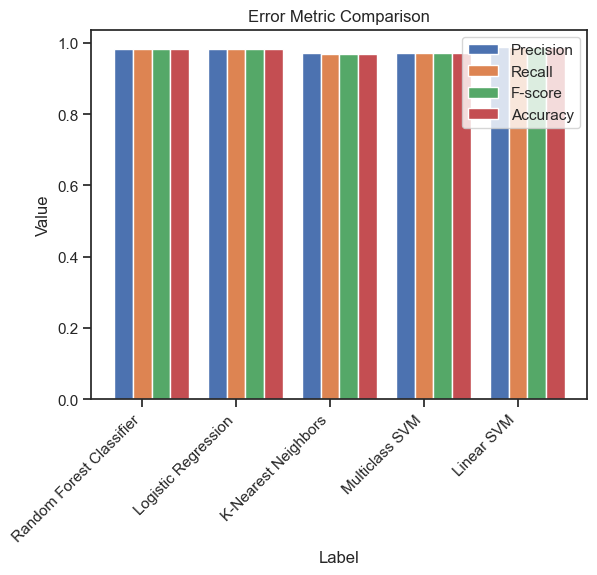

In [88]:
precision_values = err_metrics.loc['Precision', :]
recall_values = err_metrics.loc['Recall', :]
fscore_values = err_metrics.loc['F_score', :]
accuracy_values = err_metrics.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45, ha='right')
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

In [89]:
# Print out the accuracy for each activity label
models_comp = {'Random Forest': ran_for, 'Logistic Regression': logi_reg, 'KNN': knn, 'Multiclass SVM': svm_mc, 'Linear SVM': linear_svm}
accuracies = {label: {name: [] for name in models} for label in range(6)}
results = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_comp.items():
        y_pred = model.predict(x_val[y_val == label])
        acc = accuracy_score(y_val[y_val == label], y_pred)
        print(f'{name} accuracy for {label_name}: {acc:.4f}')
        accuracies[label][name] = acc
        row.append(acc)
    results.append(row)

Random Forest accuracy for LAYING: 1.0000
Logistic Regression accuracy for LAYING: 1.0000
KNN accuracy for LAYING: 0.9905
Multiclass SVM accuracy for LAYING: 1.0000
Linear SVM accuracy for LAYING: 1.0000
Random Forest accuracy for SITTING: 0.9430
Logistic Regression accuracy for SITTING: 0.9482
KNN accuracy for SITTING: 0.8653
Multiclass SVM accuracy for SITTING: 0.9067
Linear SVM accuracy for SITTING: 0.9663
Random Forest accuracy for STANDING: 0.9782
Logistic Regression accuracy for STANDING: 0.9612
KNN accuracy for STANDING: 0.9757
Multiclass SVM accuracy for STANDING: 0.9417
Linear SVM accuracy for STANDING: 0.9709
Random Forest accuracy for WALKING: 0.9891
Logistic Regression accuracy for WALKING: 1.0000
KNN accuracy for WALKING: 1.0000
Multiclass SVM accuracy for WALKING: 1.0000
Linear SVM accuracy for WALKING: 1.0000
Random Forest accuracy for WALKING_DOWNSTAIRS: 0.9966
Logistic Regression accuracy for WALKING_DOWNSTAIRS: 0.9966
KNN accuracy for WALKING_DOWNSTAIRS: 0.9966
Multic

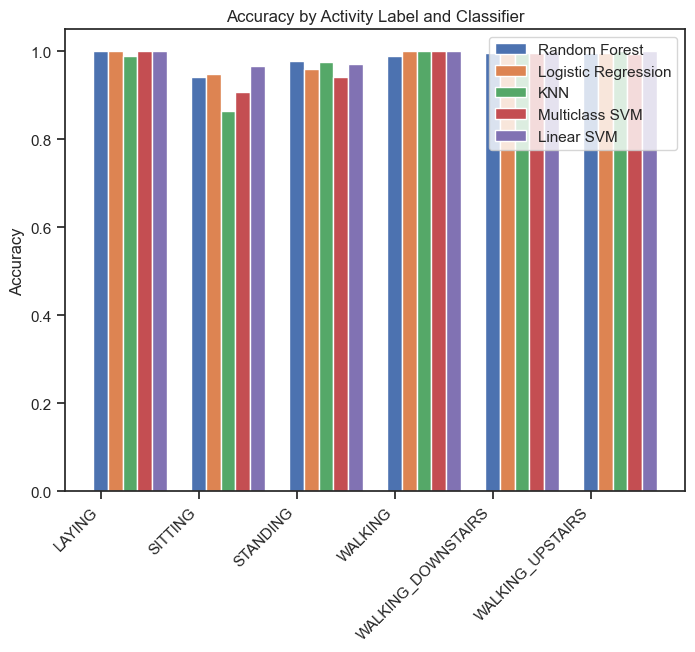

In [90]:
# Plot the bar chart
labels_a = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_a))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_comp):
    accuracies_list = [accuracies[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels_a, rotation=45, ha='right')
ax.legend()

plt.show()

In [91]:
headers = ["Activity Label"] + list(models_comp.keys())
print(tabulate(results, headers=headers, tablefmt="grid"))

+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| Activity Label     |   Random Forest |   Logistic Regression |      KNN |   Multiclass SVM |   Linear SVM |
+====================+=================+=======================+==========+==================+==============+
| LAYING             |        1        |              1        | 0.990521 |         1        |     1        |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| SITTING            |        0.943005 |              0.948187 | 0.865285 |         0.906736 |     0.966321 |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| STANDING           |        0.978155 |              0.961165 | 0.975728 |         0.941748 |     0.970874 |
+--------------------+-----------------+-----------------------+----------+------------------+--------------+
| WALKING 

In [92]:
yr_predict = list()
yr_proba = list()

labels_r = ['Random Forest Classifier(Regularization)', 'Logistic Regression(Regularization)']
models_r = [rf_clf_r, log_reg_r]

for lab, mod in zip(labels_r, models_r):
    yr_predict.append(pd.Series(mod.predict(x_val), name = lab))
    yr_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))

yr_predict = pd.concat(yr_predict, axis = 1)
yr_proba = pd.concat(yr_proba, axis = 1)
yr_predict.head()

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
0,0,0
1,5,5
2,1,1
3,0,0
4,3,3


In [93]:
yr_proba.head()

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
0,0.992000,0.995201
1,0.893706,0.999759
2,0.929031,0.998465
3,0.871113,1.000000
4,0.938987,0.984178


In [94]:
err_metrics_r = list()

for lab in labels_r:
    precision, recall, f_score, _ = error_metric(y_val, yr_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_val, yr_predict[lab])
    err_metrics_r.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
err_metrics_r= pd.concat(err_metrics_r, axis =1) 
err_metrics_r

,Random Forest Classifier(Regularization),Logistic Regression(Regularization)
Precision,0.974604,0.985951
Recall,0.974161,0.985947
F_score,0.974133,0.985946
Accuracy,0.974161,0.985947


In [95]:
# Apply cross-validation
scores = cross_val_score(rf_clf_r, x_train, y_train, cv=5)

# Print the scores
print("Cross-validation scores (RF_r):", scores)
print("Mean score:", scores.mean())

Cross-validation scores (RF_r): [0.96699029 0.96209913 0.95918367 0.9718173  0.97278912]
Mean score: 0.9665759008180249


In [96]:
# # Apply cross-validation
# scores = cross_val_score(log_reg_r, x_train, y_train, cv=5)

# # Print the scores
# print("Cross-validation scores (LR_r):", scores)
# print("Mean score:", scores.mean())

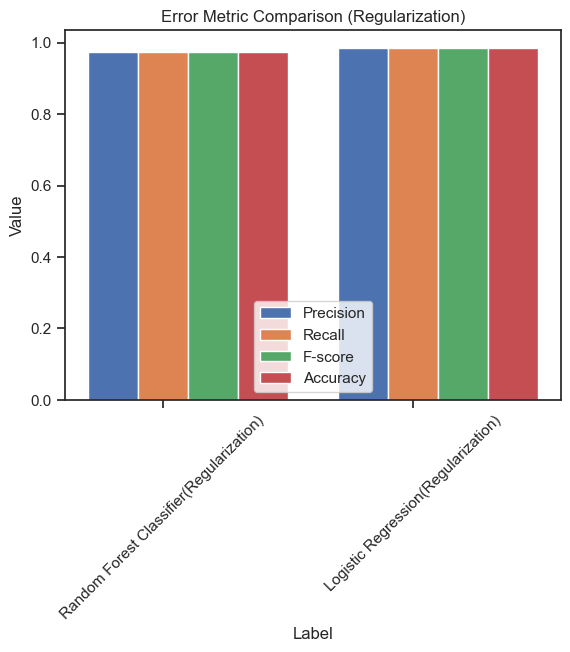

In [97]:
precision_values = err_metrics_r.loc['Precision', :]
recall_values = err_metrics_r.loc['Recall', :]
fscore_values = err_metrics_r.loc['F_score', :]
accuracy_values = err_metrics_r.loc['Accuracy', :]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(precision_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bar chart
plt.bar(r1, precision_values, width=bar_width, label='Precision')
plt.bar(r2, recall_values, width=bar_width, label='Recall')
plt.bar(r3, fscore_values, width=bar_width, label='F-score')
plt.bar(r4, accuracy_values, width=bar_width, label='Accuracy')

# Add chart title and axis labels
plt.title('Error Metric Comparison (Regularization)')
plt.xlabel('Label')
plt.xticks([r + bar_width for r in range(len(precision_values))], precision_values.index, rotation=45)
plt.ylabel('Value')
plt.legend()

# Display the chart
plt.show()

In [98]:
# Print out the accuracy for each activity label
models_compr = {'Random Forest (R)': rf_clf_r, 'Logistic Regression (R)': log_reg_r}
accuracies_r = {label: {name: [] for name in models} for label in range(6)}
results_r = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compr.items():
        y_pred = model.predict(x_val[y_val == label])
        acc_r = accuracy_score(y_val[y_val == label], y_pred)
        print(f'{name} accuracy for {label_name}: {acc_r:.4f}')
        accuracies_r[label][name] = acc_r
        row.append(acc_r)
    results_r.append(row)

Random Forest (R) accuracy for LAYING: 0.9953
Logistic Regression (R) accuracy for LAYING: 1.0000
Random Forest (R) accuracy for SITTING: 0.9119
Logistic Regression (R) accuracy for SITTING: 0.9585
Random Forest (R) accuracy for STANDING: 0.9684
Logistic Regression (R) accuracy for STANDING: 0.9660
Random Forest (R) accuracy for WALKING: 0.9864
Logistic Regression (R) accuracy for WALKING: 1.0000
Random Forest (R) accuracy for WALKING_DOWNSTAIRS: 0.9932
Logistic Regression (R) accuracy for WALKING_DOWNSTAIRS: 1.0000
Random Forest (R) accuracy for WALKING_UPSTAIRS: 0.9969
Logistic Regression (R) accuracy for WALKING_UPSTAIRS: 0.9969


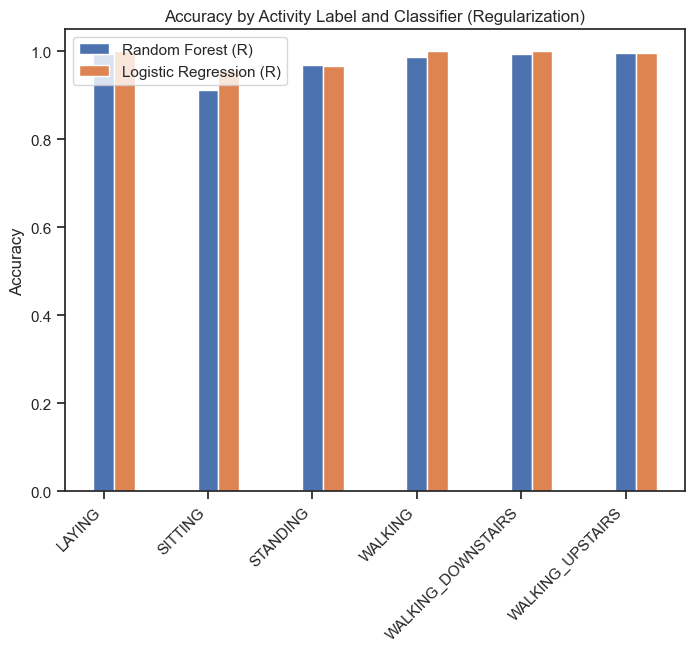

In [99]:
# Plot the bar chart
labels_ar = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_a))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_compr):
    accuracies_list_r = [accuracies_r[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list_r, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier (Regularization)')
ax.set_xticks(x)
ax.set_xticklabels(labels_ar, rotation=45, ha='right')
ax.legend()

plt.show()

In [100]:
headers = ["Activity Label"] + list(models_compr.keys())
print(tabulate(results_r, headers=headers, tablefmt="grid"))

+--------------------+---------------------+---------------------------+
| Activity Label     |   Random Forest (R) |   Logistic Regression (R) |
+====================+=====================+===========================+
| LAYING             |            0.995261 |                  1        |
+--------------------+---------------------+---------------------------+
| SITTING            |            0.911917 |                  0.958549 |
+--------------------+---------------------+---------------------------+
| STANDING           |            0.968447 |                  0.966019 |
+--------------------+---------------------+---------------------------+
| WALKING            |            0.986413 |                  1        |
+--------------------+---------------------+---------------------------+
| WALKING_DOWNSTAIRS |            0.993243 |                  1        |
+--------------------+---------------------+---------------------------+
| WALKING_UPSTAIRS   |            0.996894 |       

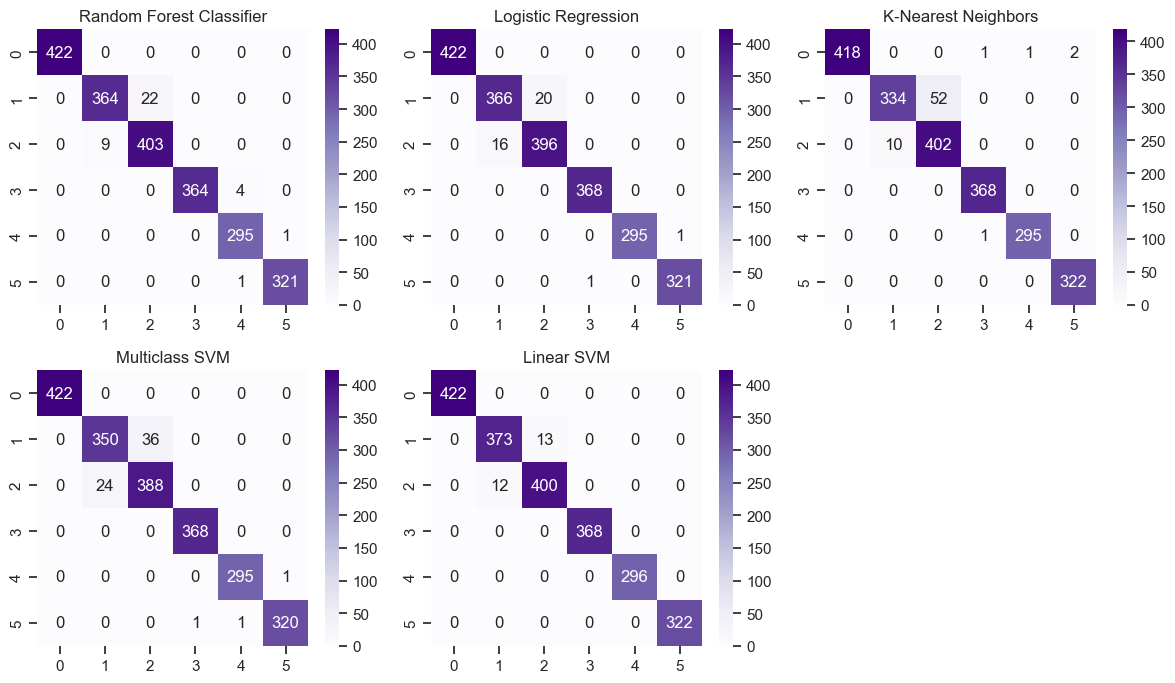

In [101]:
# Create an empty dictionary to store the confusion matrices for each model
confusion_mat1 = dict()

# Iterate through the list of model labels, computing the confusion matrix for each model and storing the result in the appropriate dictionary key
for lab in labels:
    confusion_mat1[lab] = confusion_matrix(y_val, y_predict[lab])

# Create a new figure and subplot grid with 2 rows and 3 columns
figure, axisList = plt.subplots(nrows=2, ncols=3)

# Flatten the subplot grid into a 1D array
axisList = axisList.flatten()

# Set the size of the figure
figure.set_size_inches(12, 7)

# Turn off the axis for the last subplot
axisList[-1].axis('off')

# Iterate through the subplot array and plot each confusion matrix as a heatmap with the appropriate title
for axis,lab in zip(axisList[:-1], labels):
    axis.set(title=lab);
    sns.heatmap(confusion_mat1[lab], ax=axis, annot=True, fmt='d', cmap='Purples')

# Automatically adjust the spacing between subplots to avoid overlap
plt.tight_layout()

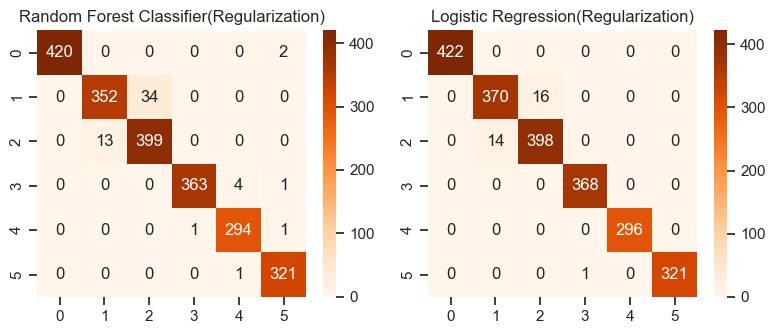

In [102]:
confusion_mat2 = dict()
for lab in labels_r:
    confusion_mat2[lab] = confusion_matrix(y_val, yr_predict[lab])

figure, axisList = plt.subplots(nrows=1, ncols=2)
axisList = axisList.flatten()
figure.set_size_inches(8, 3.5)

for axis,lab in zip(axisList[:], labels_r):
    axis.set(title=lab);
    sns.heatmap(confusion_mat2[lab], ax=axis, annot=True, fmt='d', cmap='Oranges')

plt.tight_layout()

In [104]:
# Define the hyperparameters for the voting classifier
params = {'voting': 'soft', 'weights': [1, 1]}

# Create the ensemble model
vc_clf = VotingClassifier([('log_reg', log_reg_r), ('linear_svm', linear_svm)], **params)

# Fit the ensemble model
vc_clf.fit(x_train, y_train)
y_pred = vc_clf.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.988667


In [105]:
# # Define the stacking model
# estimators = [('log_reg', log_reg_r), ('linear_svm', linear_svm)]
# final_estimator = SVC()
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# # Fit the stacking model
# stacking_model.fit(x_train, y_train)
# y_pred = stacking_model.predict(x_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Accuracy: {accuracy:.6f}")

In [106]:
# # Creating voting classifier ensemble model
# vc_clf2 = VotingClassifier(estimators=[('random_forest', ran_for), ('logi_reg_l2', log_reg_r)], voting='hard')
# vc_clf2.fit(x_train, y_train)
# y_pred = vc_clf2.predict(x_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Accuracy: {accuracy:.6f}")

In [107]:
# Print out the accuracy for each activity label
models_compf = {'Voting Classifier': vc_clf}
accuracies_f = {label: {name: [] for name in models} for label in range(6)}
results_f = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compf.items():
        yf_pred = model.predict(x_val[y_val == label])
        acc_f = accuracy_score(y_val[y_val == label], yf_pred)
        print(f'{name} accuracy for {label_name}: {acc_f:.4f}')
        accuracies_f[label][name] = acc_f
        row.append(acc_f)
    results_f.append(row)

Voting Classifier accuracy for LAYING: 1.0000
Voting Classifier accuracy for SITTING: 0.9663
Voting Classifier accuracy for STANDING: 0.9709
Voting Classifier accuracy for WALKING: 1.0000
Voting Classifier accuracy for WALKING_DOWNSTAIRS: 1.0000
Voting Classifier accuracy for WALKING_UPSTAIRS: 1.0000


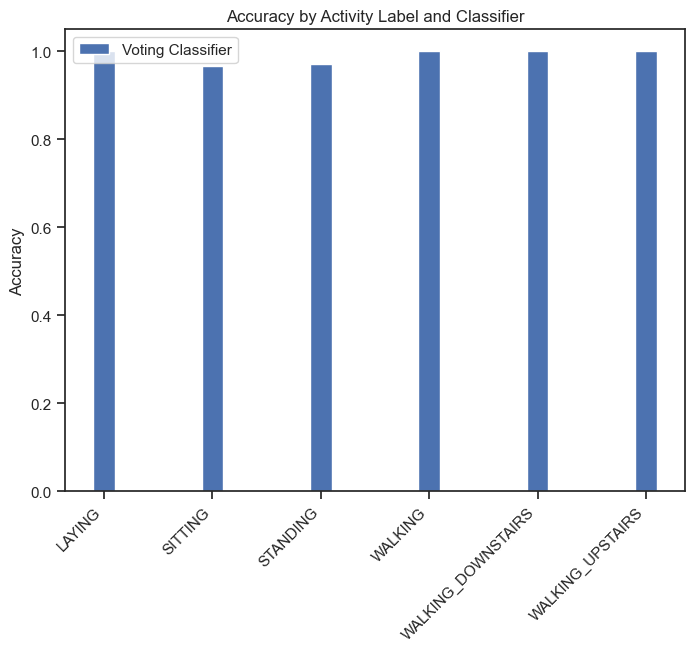

In [108]:
# Plot the bar chart
labels_af = [labEncoder.inverse_transform([i])[0] for i in range(6)]
x = np.arange(len(labels_af))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
for i, name in enumerate(models_compf):
    accuracies_list_f = [accuracies_f[label][name] for label in range(6)]
    ax.bar(x + i*width, accuracies_list_f, width, label=name)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activity Label and Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels_af, rotation=45, ha='right')
ax.legend()

plt.show()

In [109]:
headers = ["Activity Label"] + list(models_compf.keys())
print(tabulate(results_f, headers=headers, tablefmt="grid"))

+--------------------+---------------------+
| Activity Label     |   Voting Classifier |
+====================+=====================+
| LAYING             |            1        |
+--------------------+---------------------+
| SITTING            |            0.966321 |
+--------------------+---------------------+
| STANDING           |            0.970874 |
+--------------------+---------------------+
| WALKING            |            1        |
+--------------------+---------------------+
| WALKING_DOWNSTAIRS |            1        |
+--------------------+---------------------+
| WALKING_UPSTAIRS   |            1        |
+--------------------+---------------------+


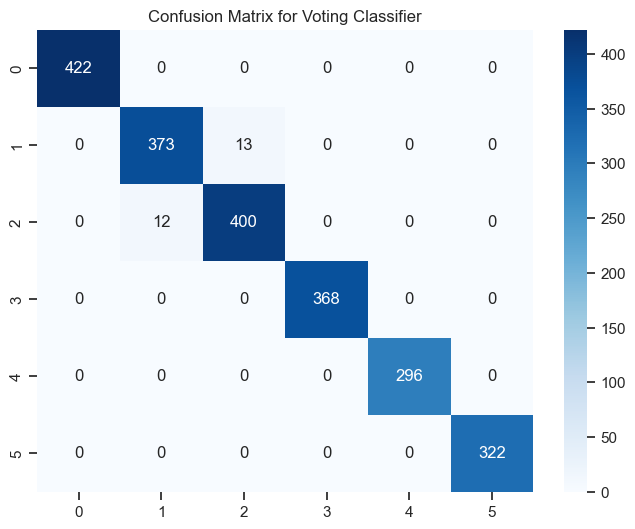

In [110]:
confusion_matf = dict()
confusion_matf = confusion_matrix(y_val, y_pred)
figure, axis = plt.subplots()
figure.set_size_inches(8, 6)
axis.set(title='Confusion Matrix for Voting Classifier')
sns.heatmap(confusion_matf, ax=axis, annot=True, fmt='d', cmap='Blues')
plt.show()

In [112]:
# # Combine the classifiers using Voting Classifier
# ensemble_clf = VotingClassifier(estimators=[('random_forest', ran_for), ('stacking_model', stacking_model)], voting='hard')

# # Train and evaluate the ensemble classifier
# ensemble_clf.fit(x_train, y_train)
# y_pred = ensemble_clf.predict(x_val)
# acc = accuracy_score(y_val, y_pred)
# print(f"Ensemble Classifier accuracy: {acc}")

In [113]:
# Split the test data into a testing and holdout set
x_test, x_holdout, y_test, y_holdout = train_test_split(
    test[feature_columns], 
    test['Activity'], 
    test_size=0.5, # Use 50% of the test data for testing
    random_state=42
)

# Print the size of the testing and holdout sets
print(f"Testing set size: {len(x_test)}")
print(f"Holdout set size: {len(x_holdout)}")

Testing set size: 1473
Holdout set size: 1474


In [114]:
ytest_predict = list()
ytest_proba = list()

labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']
models = [ran_for, logi_reg, knn, svm_mc, linear_svm]

for lab, mod in zip(labels, models):
    ytest_predict.append(pd.Series(mod.predict(x_test), name = lab))
    ytest_proba.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name = lab))

ytest_predict = pd.concat(ytest_predict, axis = 1)
ytest_proba = pd.concat(ytest_proba, axis = 1)
ytest_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,2,2,2,2,2
1,4,4,4,4,4
2,3,3,3,3,3
3,1,1,1,1,1
4,2,2,2,2,2


In [115]:
errtest_metrics = list()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_test, ytest_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y_test, ytest_predict[lab])
    errtest_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
errtest_metrics= pd.concat(errtest_metrics, axis =1) 
errtest_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.929116,0.961734,0.921509,0.953619,0.966049
Recall,0.928038,0.960625,0.915139,0.953157,0.965377
F_score,0.927814,0.960465,0.913780,0.953104,0.965243
Accuracy,0.928038,0.960625,0.915139,0.953157,0.965377


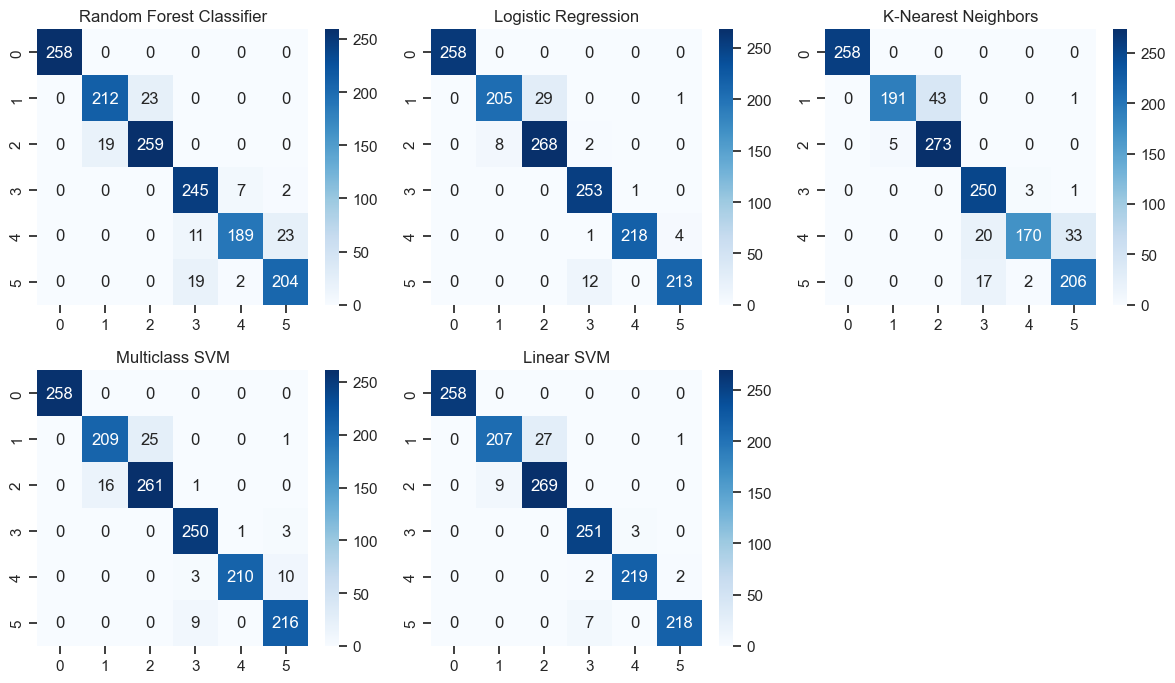

In [116]:
confusiontest_mat = dict()

for lab in labels:
    confusiontest_mat[lab] = confusion_matrix(y_test, ytest_predict[lab])

figure, axisList = plt.subplots(nrows=2, ncols=3)
axisList = axisList.flatten()
figure.set_size_inches(12, 7)

axisList[-1].axis('off')

for axis,lab in zip(axisList[:-1], labels):
    axis.set(title=lab);
    sns.heatmap(confusiontest_mat[lab], ax=axis, annot=True, fmt='d', cmap='Blues')
    
plt.tight_layout()

In [121]:
yt_pred = vc_clf.predict(x_test)
accuracy = accuracy_score(y_test, yt_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.965377


In [122]:
# Print out the accuracy for each activity label
models_compt = {'Voting Classifier': vc_clf}
results_t = []

for label in range(6):
    label_name = labEncoder.inverse_transform([label])[0]
    row = [label_name]
    for name, model in models_compt.items():
        yt_pred_t = model.predict(x_test[y_test == label])
        acc_t = accuracy_score(y_test[y_test == label], yt_pred_t)
        row.append(acc_t)
    results_t.append(row)

In [123]:
headers = ["Activity Label"] + list(models_compt.keys())
print(tabulate(results_t, headers=headers, tablefmt="grid"))

+--------------------+---------------------+
| Activity Label     |   Voting Classifier |
+====================+=====================+
| LAYING             |            1        |
+--------------------+---------------------+
| SITTING            |            0.876596 |
+--------------------+---------------------+
| STANDING           |            0.967626 |
+--------------------+---------------------+
| WALKING            |            0.996063 |
+--------------------+---------------------+
| WALKING_DOWNSTAIRS |            0.982063 |
+--------------------+---------------------+
| WALKING_UPSTAIRS   |            0.964444 |
+--------------------+---------------------+


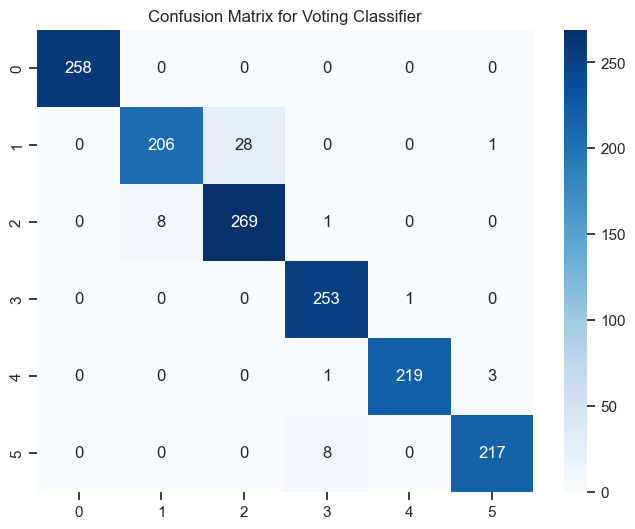

In [124]:
confusion_matt = dict()
confusion_matt = confusion_matrix(y_test, yt_pred)
figure, axis = plt.subplots()
figure.set_size_inches(8, 6)
axis.set(title='Confusion Matrix for Voting Classifier')
sns.heatmap(confusion_matt, ax=axis, annot=True, fmt='d', cmap='Blues')
plt.show()

In [125]:
test_ = pd.read_csv("Dataset/manual_test.csv")

In [126]:
test_.drop('subject', axis =1, inplace=True)

In [127]:
# Applying LabelEncoder function

labEncoder = LabelEncoder()
for x in [test_]:
    x['Activity'] = labEncoder.fit_transform(x.Activity)
    
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

In [128]:
print(test_.iloc[30]['Activity'])

4.0


In [129]:
# Split the test data into a testing and holdout set
x1_test, y1_test = (
    test_[feature_columns], 
    test_['Activity'], 
)

In [130]:
y1test_predict = list()
y1test_proba = list()

labels = ['Random Forest Classifier', 'Logistic Regression', 'K-Nearest Neighbors', 'Multiclass SVM', 'Linear SVM']

for lab, mod in zip(labels, models):
    y1test_predict.append(pd.Series(mod.predict(x1_test), name = lab))
    y1test_proba.append(pd.Series(mod.predict_proba(x1_test).max(axis=1), name = lab))

y1test_predict = pd.concat(y1test_predict, axis = 1)
y1test_proba = pd.concat(y1test_proba, axis = 1)
y1test_predict.head()

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,2,2,2,2,2
1,2,2,2,2,2
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2


In [131]:
y1test_proba

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
0,0.87,0.955451,0.871192,0.998952,0.941455
1,0.68,0.957027,0.536855,0.857061,0.994160
2,0.87,0.966504,0.934261,0.921523,0.990182
3,0.95,0.995857,0.935527,0.998937,0.996388
4,0.86,0.998978,1.000000,0.999218,0.998653
5,0.50,0.573832,0.656891,0.639135,0.767769
6,0.67,0.592159,0.663333,0.728826,0.509317
7,0.91,0.998456,1.000000,0.999424,0.999461
8,0.64,0.840622,0.597176,0.899661,0.753274
9,0.91,0.937231,0.667273,0.852786,0.955410


In [132]:
errtest_metrics = list()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y1_test, y1test_predict[lab], average = 'weighted')
    accuracy = accuracy_score(y1_test, y1test_predict[lab])
    errtest_metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
errtest_metrics= pd.concat(errtest_metrics, axis =1) 
errtest_metrics

,Random Forest Classifier,Logistic Regression,K-Nearest Neighbors,Multiclass SVM,Linear SVM
Precision,0.870418,0.931439,0.912500,0.956944,0.979167
Recall,0.825000,0.925000,0.900000,0.950000,0.975000
F_score,0.813571,0.921732,0.898701,0.946872,0.975000
Accuracy,0.825000,0.925000,0.900000,0.950000,0.975000


In [133]:
# Use the predict method to make predictions on your test data
y_pred = linear_svm.predict(x1_test)

# Print the predicted output
# STANDING --> 2
# SITTING --> 1
# LAYING --> 0
# WALKING --> 3
# WALKING_DOWNSTAIRS --> 4
# WALKING_UPSTAIRS --> 5

x=1
for i in y_pred:
    if(i==0): print(x,"LAYING")
    elif(i==1): print(x,"SITTING")
    elif(i==2): print(x,"STANDING")
    elif(i==3): print(x,"WALKING")
    elif(i==4): print(x,"WALKING_DOWNSTAIRS")
    elif(i==5): print(x,"WALKING_UPSTAIRS")
    x+=1

1 STANDING
2 STANDING
3 STANDING
4 STANDING
5 STANDING
6 SITTING
7 SITTING
8 SITTING
9 SITTING
10 SITTING
11 STANDING
12 LAYING
13 LAYING
14 LAYING
15 WALKING
16 WALKING
17 WALKING
18 WALKING
19 WALKING
20 WALKING
21 WALKING
22 WALKING
23 WALKING
24 WALKING
25 WALKING_DOWNSTAIRS
26 WALKING_DOWNSTAIRS
27 WALKING_DOWNSTAIRS
28 WALKING_DOWNSTAIRS
29 WALKING_DOWNSTAIRS
30 WALKING_DOWNSTAIRS
31 WALKING_DOWNSTAIRS
32 WALKING_DOWNSTAIRS
33 WALKING_UPSTAIRS
34 WALKING_UPSTAIRS
35 WALKING_UPSTAIRS
36 WALKING_UPSTAIRS
37 WALKING_UPSTAIRS
38 WALKING_UPSTAIRS
39 WALKING_UPSTAIRS
40 WALKING_UPSTAIRS


In [134]:
# Define the activity labels
activity_labels = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Create the GUI
class App:
    def __init__(self, master):

        # Initialize the index counter
        self.index = 0

        # Set the master frame
        self.master = master

        # Set the title
        master.title("Activity Prediction GUI")

        # Set the window size
        master.geometry("1000x500")
        
        #Setting minsize
        master.minsize(1000, 500)

        # Set the background color
        master.configure(bg='#0579b5')

        # Set the label for the output
        self.output_label = tk.Label(master, text="", font=('Helvetica', 20), fg='white', bg='#0579b5')
        self.output_label.pack(pady=20)

        # Set the button to iterate to the next record
        self.next_button = tk.Button(master, text="Next Record", font=('Helvetica', 14), bg='white', command=self.next_record)
        self.next_button.pack(side=tk.RIGHT, padx=10)

        # Set the button to display the percentage of each activity
        self.percentage_button = tk.Button(master, text="Activity Percentage", font=('Helvetica', 14), bg='white', command=self.activity_percentage)
        self.percentage_button.pack(side=tk.LEFT, padx=10)

        self.activity_counters = {}
        for label in activity_labels:
            self.activity_counters[label] = 0

        # Create a Figure object for the plot
        self.fig = plt.Figure(figsize=(8,6), dpi=100)

        # Create a Canvas for the plot
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)

        # Create a Subplot for the plot
        self.ax = self.fig.add_subplot(111)
        self.ax.set_title('Activity Percentage')
        self.ax.set_xlabel('Activity')
        self.ax.set_ylabel('Percentage')

    # Function to predict the activity for the next record
    def next_record(self):

        # Check if all records have been processed
        if self.index == len(x1_test):
            self.output_label.configure(text="All records processed!")
            self.next_button.configure(state='disabled')
            return

        # Predict the activity
        activity = linear_svm.predict(x1_test)

        # Map the activity code to the activity label
        activity_label = activity_labels[activity[self.index]]

        # Increment the index counter
        self.index += 1

        # Update the activity counters
        self.activity_counters[activity_label] += 1

        # Calculate the activity percentages
        total_activities = sum(self.activity_counters.values())
        activity_percentages = {}
        for label in activity_labels:
            activity_percentages[label] = self.activity_counters[label] / total_activities

        # Update the output label
        output_text = "Record " + str(self.index) + ": " + activity_label
        self.output_label.configure(text=output_text)

    # Function to display the percentage of each activity in a new window
    def activity_percentage(self):
        if self.index == 0:
            # No record has been processed yet
            self.output_label.configure(text="Please process at least one record before checking activity percentage.")
            return
        
        # Calculate the activity percentages
        total_activities = sum(self.activity_counters.values())
        activity_percentages = {}
        for label in activity_labels:
            activity_percentages[label] = self.activity_counters[label] / total_activities

        # Create a new window
        percentage_window = tk.Toplevel(self.master)
        percentage_window.title("Activity Percentage")
        percentage_window.geometry("1500x600")
        percentage_window.minsize(1400, 600)

        # Create a Figure object for the plot
        fig = plt.Figure(figsize=(8,6), dpi=100)
        
        # Define colors for each activity
        activity_colors = {
                    0: 'violet',
                    1: 'blue',
                    2: 'indigo',
                    3: 'green',
                    4: 'orange',
                    5: 'red',
                    }

        # Create a Subplot for the plot
        ax = fig.add_subplot(111)
        for i, label in enumerate(activity_labels):
            ax.bar(label, activity_percentages[label], color=activity_colors[i])
        ax.set_title('Activity Percentage')
        ax.set_xlabel('Activity')
        ax.set_ylabel('Percentage')
        ax.set_ylim([0, 1])

        # Add the percentage labels to the plot
        for i, percentage in enumerate(activity_percentages.values()):
            ax.text(i, percentage+0.05, f"{percentage*100:.2f}%", horizontalalignment='center')

        # Create a Canvas for the plot
        canvas = FigureCanvasTkAgg(fig, master=percentage_window)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)


root = tk.Tk()
app = App(root)
root.mainloop()